<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220626.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor 
* customer analysis

In [35]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [8]:
raw = skd.load_breast_cancer()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
x.columns = [a.replace(' ', '_') for a in x.columns]
x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [12]:
res = [KMeans(n_clusters = a).fit(x_std).inertia_ for a in range(1, 7)]

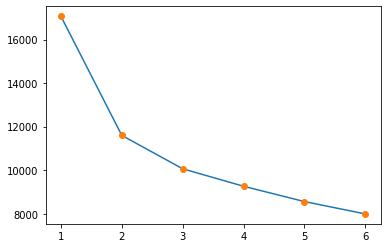

In [13]:
plt.plot(range(1,7), res)
plt.plot(range(1,7), res, 'o')

In [15]:
fit_km2 = KMeans(n_clusters = 2).fit(x_std)
fit_km3 = KMeans(n_clusters = 3).fit(x_std)

In [16]:
pca = PCA(n_components=10)
fit_pca = pca.fit_transform(x_std)

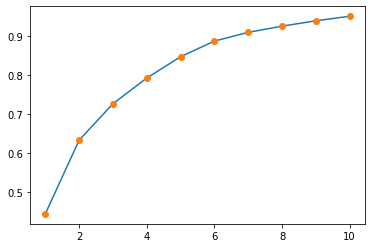

In [18]:
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum())
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum(), 'o')

In [23]:
fit_pca = pd.DataFrame(np.c_[fit_pca, y.reshape(-1,1), fit_km2.labels_.reshape(-1,1), fit_km3.labels_.reshape(-1,1)],
             columns = [f'pc{a}' for a in range(1,11)] + ['y', 'cl2', 'cl3'])
fit_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,y,cl2,cl3
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425,2.159370,-0.398410,-0.157108,-0.877404,0.0,0.0,1.0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240991,-0.711912,1.106994,0.0,0.0,1.0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097370,0.024073,0.454277,0.0,0.0,1.0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059564,-1.405438,-1.116974,0.0,0.0,2.0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636379,-0.263810,0.377704,0.0,0.0,1.0


In [30]:
fit_pca = fit_pca.assign(cl3 = fit_pca['cl3'].replace({1:0, 2:1, 0:2})
               )
fit_pca = fit_pca.assign( y = fit_pca['y'].astype(str),
               cl2 = fit_pca['cl2'].astype(str),
               cl3 = fit_pca['cl3'].astype(str))

fit_pca.head()      

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,y,cl2,cl3
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425,2.159370,-0.398410,-0.157108,-0.877404,0.0,0.0,2.0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240991,-0.711912,1.106994,0.0,0.0,2.0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097370,0.024073,0.454277,0.0,0.0,2.0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059564,-1.405438,-1.116974,0.0,0.0,0.0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636379,-0.263810,0.377704,0.0,0.0,2.0


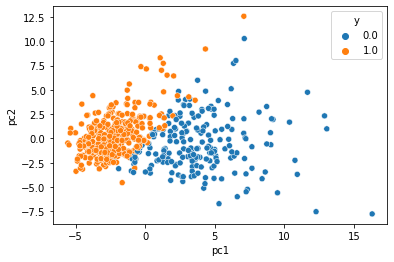

In [31]:
sns.scatterplot(data = fit_pca, x = 'pc1', y = 'pc2', hue = 'y')

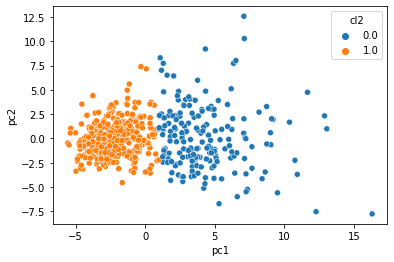

In [32]:
sns.scatterplot(data = fit_pca, x = 'pc1', y = 'pc2', hue = 'cl2')

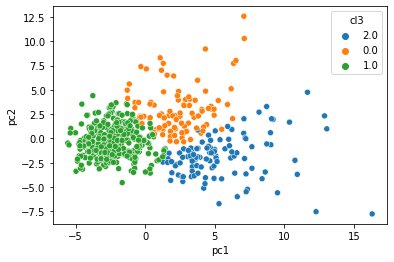

In [33]:
sns.scatterplot(data = fit_pca, x = 'pc1', y = 'pc2', hue = 'cl3')

In [36]:
accuracy_score(fit_pca['y'], fit_pca['cl2'])

0.9050966608084359

# customer analysis

In [2]:
os.listdir()

['.config',
 'ecommerce-data.csv',
 'rfm_test.csv',
 'sales_train.csv',
 'shops.csv',
 'retail_data_transactions.csv',
 'test.csv',
 'retail_data_response.csv',
 '.Rhistory',
 'items.csv',
 'item_categories.csv',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sample_submission.csv',
 'sample_data']

In [4]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [37]:
df.columns = df.iloc[0]
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [39]:
df = df.drop([0], axis = 0)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [40]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object', name=0)

In [42]:
df = df[(df['order_status'] == 'Approved') & (~df['transaction_id'].astype(str).str.contains('C'))]
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [43]:
df['date'] = df['transaction_date'].to_numpy().astype('datetime64[D]')
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,date,month
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2017-02-25,2017-02-01
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,2017-05-21,2017-05-01
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,2017-10-16,2017-10-01
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145,2017-08-31,2017-08-01
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226,2017-10-01,2017-10-01


In [46]:
df = df[['customer_id','date', 'month','list_price']].rename(columns = {'customer_id':'id', 'list_price':'rev'})
df.head()

,id,date,month,rev
1,2950,2017-02-25,2017-02-01,71.49
2,3120,2017-05-21,2017-05-01,2091.47
3,402,2017-10-16,2017-10-01,1793.43
4,3135,2017-08-31,2017-08-01,1198.46
5,787,2017-10-01,2017-10-01,1765.3


In [51]:
df = df.groupby(['id', 'date', 'month'])['rev'].sum().reset_index()

In [52]:
df = df.sort_values(['id', 'date'], ascending = [1,0])
df.head()

,id,date,month,rev
10,1,2017-12-23,2017-12-01,235.63
9,1,2017-12-14,2017-12-01,230.91
8,1,2017-12-09,2017-12-01,742.54
7,1,2017-06-04,2017-06-01,642.7
6,1,2017-05-19,2017-05-01,1538.99


In [59]:
info_m = df.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'], ascending = [1,0])
info_m = info_m.groupby(['id']).head(3)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()

,id,money
0,1,1209.08
1,2,0.00
2,3,0.00
3,4,0.00
4,5,1812.75


In [60]:
info_f = df.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'month'], ascending = [1,0])
info_f = info_f.groupby(['id']).head(3)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()

,id,freq
0,1,3.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,1.0


In [61]:
df['date'].max()

Timestamp('2017-12-30 00:00:00')

In [62]:
date_now = datetime(2017,12,31)

In [64]:
info_r = df.groupby(['id']).agg({'date' : lambda x : (date_now - x.max()).days}).reset_index().rename(columns = {'date':'recency'})
info_r.head()

,id,recency
0,1,8
1,2,129
2,3,103
3,4,196
4,5,17


In [66]:
info = pd.merge(pd.merge(info_r, info_f, 'left', 'id'), info_m, 'left', 'id')
info.head()

,id,recency,freq,money
0,1,8,3.0,1209.08
1,2,129,0.0,0.00
2,3,103,0.0,0.00
3,4,196,0.0,0.00
4,5,17,1.0,1812.75


In [71]:
info = info.assign(r = pd.qcut(info['recency'], 5, list('12345')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('54321')),
            m = pd.qcut(info['money'].rank(method = 'first'), 5, list('54321'))
            )
info.head()

,id,recency,freq,money,r,f,m
0,1,8,3.0,1209.08,1,1,3
1,2,129,0.0,0.00,5,5,5
2,3,103,0.0,0.00,5,5,5
3,4,196,0.0,0.00,5,5,5
4,5,17,1.0,1812.75,2,4,2


In [72]:
info = info.assign(rf = info['r'].astype(str) + info['f'].astype(str))
info.head()

,id,recency,freq,money,r,f,m,rf
0,1,8,3.0,1209.08,1,1,3,11
1,2,129,0.0,0.00,5,5,5,55
2,3,103,0.0,0.00,5,5,5,55
3,4,196,0.0,0.00,5,5,5,55
4,5,17,1.0,1812.75,2,4,2,24


In [73]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [74]:
info.assign(rf = info['rf'].replace(seg_map, regex = True))

,id,recency,freq,money,r,f,m,rf
0,1,8,3.0,1209.08,1,1,3,hibernating
1,2,129,0.0,0.00,5,5,5,champions
2,3,103,0.0,0.00,5,5,5,champions
3,4,196,0.0,0.00,5,5,5,champions
4,5,17,1.0,1812.75,2,4,2,at_Risk
...,...,...,...,...,...,...,...,...
3488,3497,53,1.0,1403.50,3,3,3,need_attention
3489,3498,128,0.0,0.00,5,4,4,champions
3490,3499,52,1.0,544.05,3,3,4,need_attention
3491,3500,145,0.0,0.00,5,4,4,champions
